# PROJET SYSTEME CHAOTIQUE

## I. Motivations

Dans ce mini-projet, nous allons étudier le comportement d'un système chaotique. 

Nous prenons comme exemple l'évolution d'une population de lapins vérifiant, pour $n_i$ la population de lapins l'année $i$, et $\alpha$ le nombre de petits par portée (une par an):  

$$n_{i+1} = \alpha  n_i$$ 

Si $\alpha$ est une constante, alors, on obtiendra l'année $p$

$$ n_p = \alpha^p n_0 $$

c'est-à-dire une croissance exponentielle de la population de lapins. Cependant, par la connaissance des données physiques du problème, on définit $\alpha$ non plus comme une constante mais comme une fonction des $n_i$ ainsi que d'autres paramètres. Par exemple, l'évolution de la population de lapins dépendra de la quantité de nourriture disponible ou de la présence de prédateurs. Si l'on note $r$ le taux de croissance maximal et $n_{\max}$ le nombre maximal de lapins qu'il peut exister (en consommant donc toutes les ressources), alors le coefficient $\alpha$ pourrait s'écrire

$$ \alpha = r \left( 1 - \frac{n_i}{n_{\max}} \right) $$

La forme de l'équation d'évolution de la population devient alors

$$ n_{i+1} = r \left( 1 - \frac{n_i}{n_{\max}} \right) n_i $$

et peut se réécrire avec la nouvelle variable $x_i = n_i / n_{\max}$

$$ x_{i+1} = r (1-x_i)x_i $$

que l'on appelle « l'équation logistique ». Pour l'étude de cette équation, on introduit la fonction

$$ f(x) = r (1-x) x $$

dont le seul paramètre est donc $r$. Nous allons voir que suivant les valeurs de $r$, le comportement asymptotique de la suite

$$ x_{i+1} = f(x_i) $$

présente un comportement chaotique. $r$ est compris entre 1 et 4.

### Aspect mathématique


En fait on étudie le comportement d'une suite récurrente déterminée par $x_{i+1} = f(x_i)$ avec f la fonction caractéristique de l'équation logistique : 

$$ f(x) = r (1-x) x $$ 

dont le seul paramètre est $r$. Nous allons voir que cette suite présente un caractère chaotique car une différence minime
des conditions initiales (premier terme de la suite) conduit à une différence considérable sur son comportement asymptotique.

## II. Première étude de la suite

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#On définit la fonction logistique dont on va étudier le comportement dans tout ce mini-projet
def fonction(r, x):  
    """fonction logistique"""
    return r*(1-x)*x

In [3]:
#On initialise les paramètres
x_0 = 0.1
nb_valeurs_de_r = 10 #à cause du subplots utilisé pour l'affichage, on doit avoir minimum 3 valeurs de r
nb_valeurs_de_la_suite = 100

In [4]:
#Comme on va tester la suite sur plusieurs valeurs de r, on construit directement un tableau de valeurs pour r
r = np.linspace(2.5, 4, nb_valeurs_de_r)

In [5]:
#on initialise la suite comme une liste de liste, qui contient autant de lignes que de valeurs différentes de r
suite = np.array([np.full((nb_valeurs_de_la_suite), x_0) for i in range(nb_valeurs_de_r)])
abscisse = np.linspace(x_0, x_0*nb_valeurs_de_la_suite, nb_valeurs_de_la_suite)

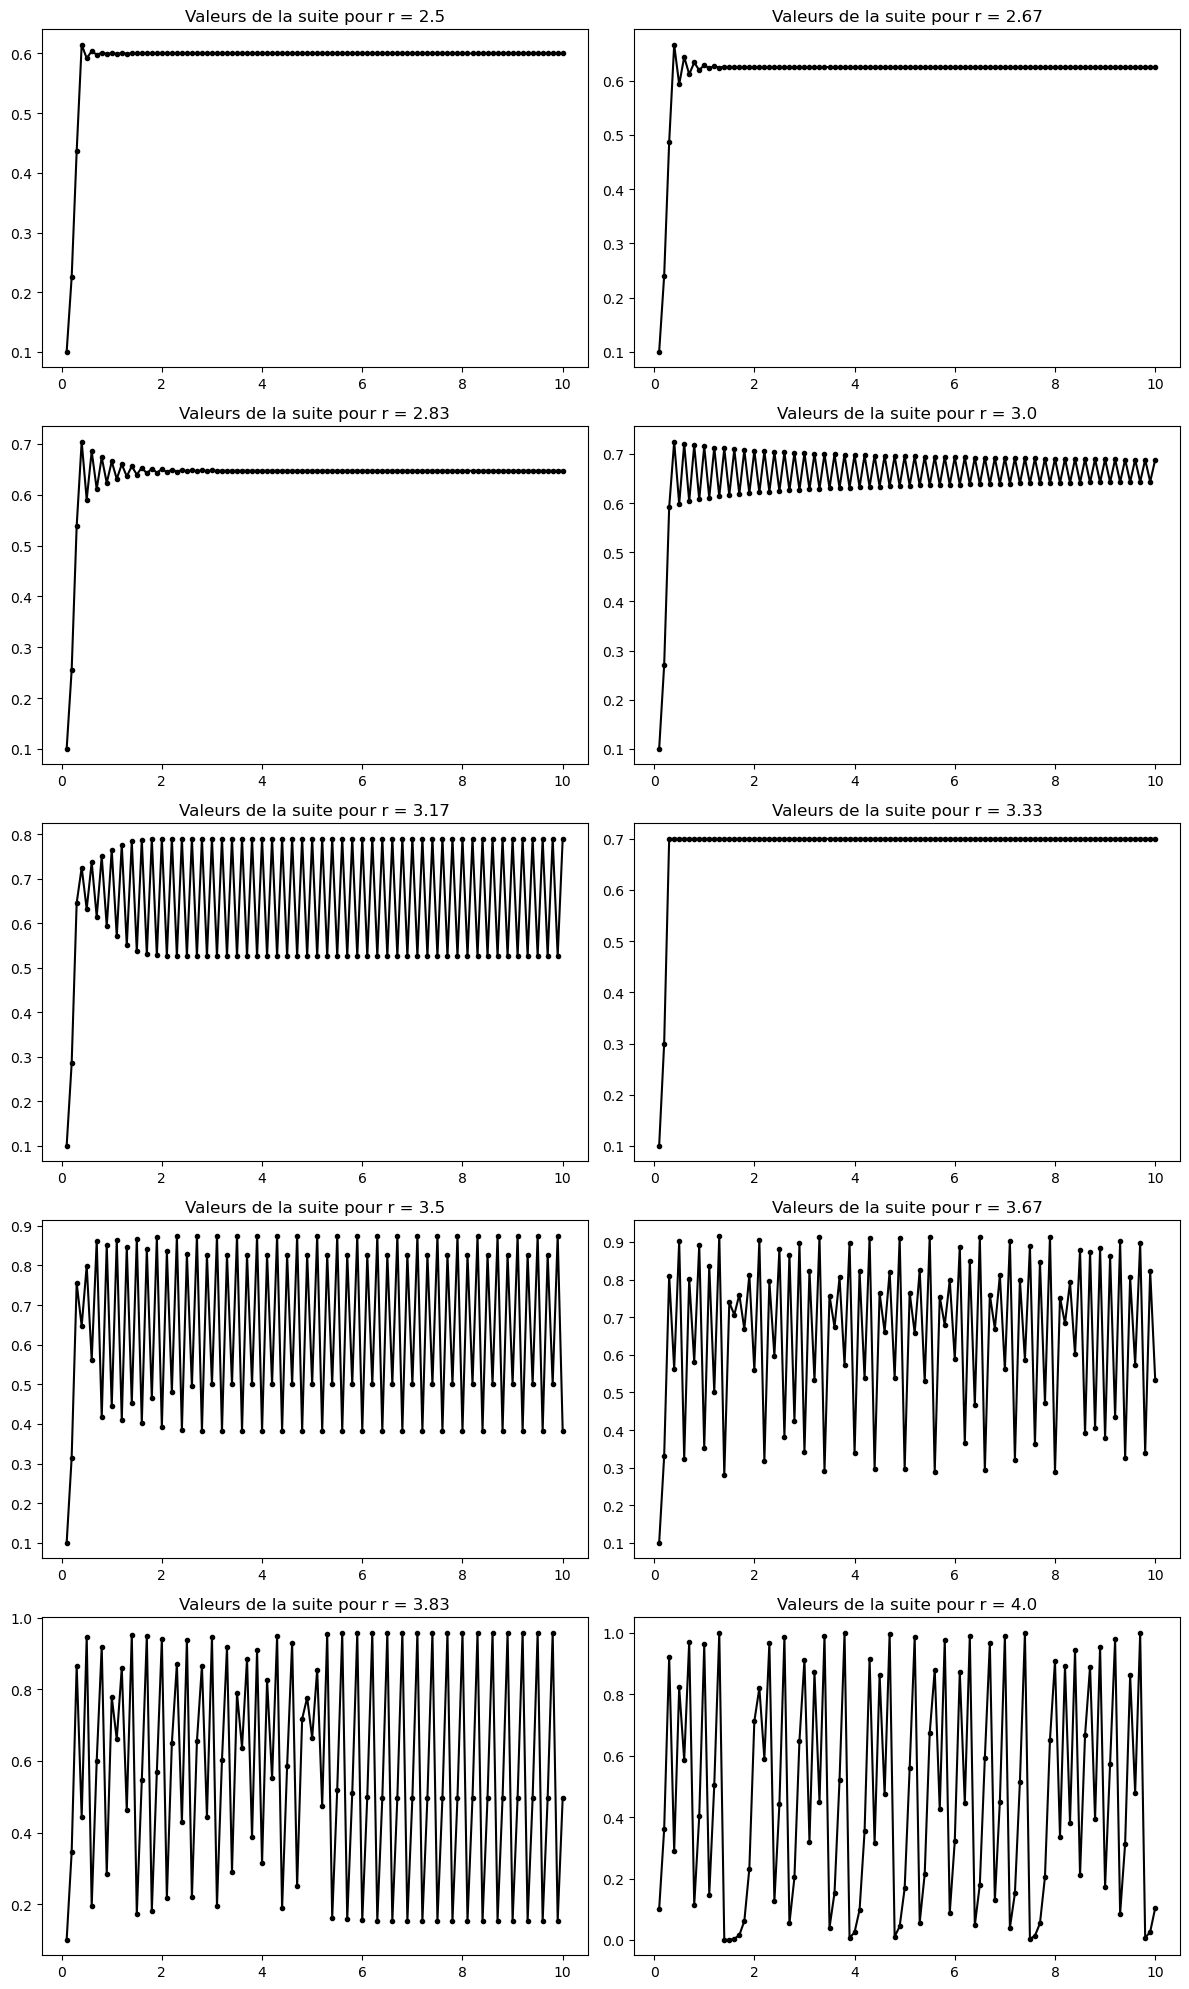

In [6]:
#on crée les figures
fig, axs = plt.subplots(nb_valeurs_de_r // 2 if nb_valeurs_de_r % 2 == 0 else nb_valeurs_de_r // 2 + 1, 2, figsize=(12, nb_valeurs_de_r*2))                   

for j in range(nb_valeurs_de_r):
    #on construit la suite pour chaque valeur de r différente: on ajoute à la suite, au terme i+1, f(r, suite[i])
    for i in range(1, nb_valeurs_de_la_suite):
        #on commence à i = 1 car le premier élément de la suite est imposé
        suite_i = fonction(r[j], suite[j][i-1])
        suite[j][i] = suite_i

    #on construit le tableau de figures
    graphiques_lignes = j // 2 
    graphiques_colonnes = j % 2

    #on fait apparaître les figures
    axs[graphiques_lignes, graphiques_colonnes].plot(abscisse, suite[j], marker='.', color='k')
    axs[graphiques_lignes, graphiques_colonnes].set_title(f'Valeurs de la suite pour r = {round(r[j], 2)}')

plt.tight_layout()
plt.show()

**On constate que pour une toute petite modification des paramètres, le comportement de la suite change complètement: c'est bien la définition d'un système chaotique.**

## III. Diagramme de bifurcation

Dans cette sous-partie nous allons étudier plus en détail le comportement asymptotique de la suite. En effet, dans la partie précédente nous avons vu que la suite pouvait soit converger soit diverger en fonction du paramètre `r`. Nous allons maintenant déterminer les conditions de convergence de la suite en fonction de la valeur de `r` et de la valeur de $x_0$, le premier terme de la suite.

In [7]:
#on initialise de nouveau les paramètres
nb_valeurs_de_x0 = 10 #à cause du subplots utilisé pour l'affichage, on doit avoir minimum 3 valeurs de x0
x_0_2 = np.logspace(-5, 0, num=nb_valeurs_de_x0)
nb_valeurs_de_r_2 = 500
r_2 = np.linspace(2.5, 4, nb_valeurs_de_r_2)
nb_valeurs_de_la_suite_2 = 500

In [8]:
#on recrée une deuxième suite que l'on nomme suite_2 pour éviter la confusion avec la première.
#cette deuxième suite est de dimensions différentes à la première comme nous avons changé le nombre de valeurs de r possibles
suite_2 = np.array(np.full((nb_valeurs_de_r_2, nb_valeurs_de_la_suite_2), x_0_2[0]))

In [9]:
#on crée une autre suite qui ne contiendra que la partie de suite_2 qui nous intéresse: les 100 derniers termes
nb_valeurs_de_la_suite_finale = 100
suite_finale = np.ones((nb_valeurs_de_r_2, nb_valeurs_de_la_suite_finale))

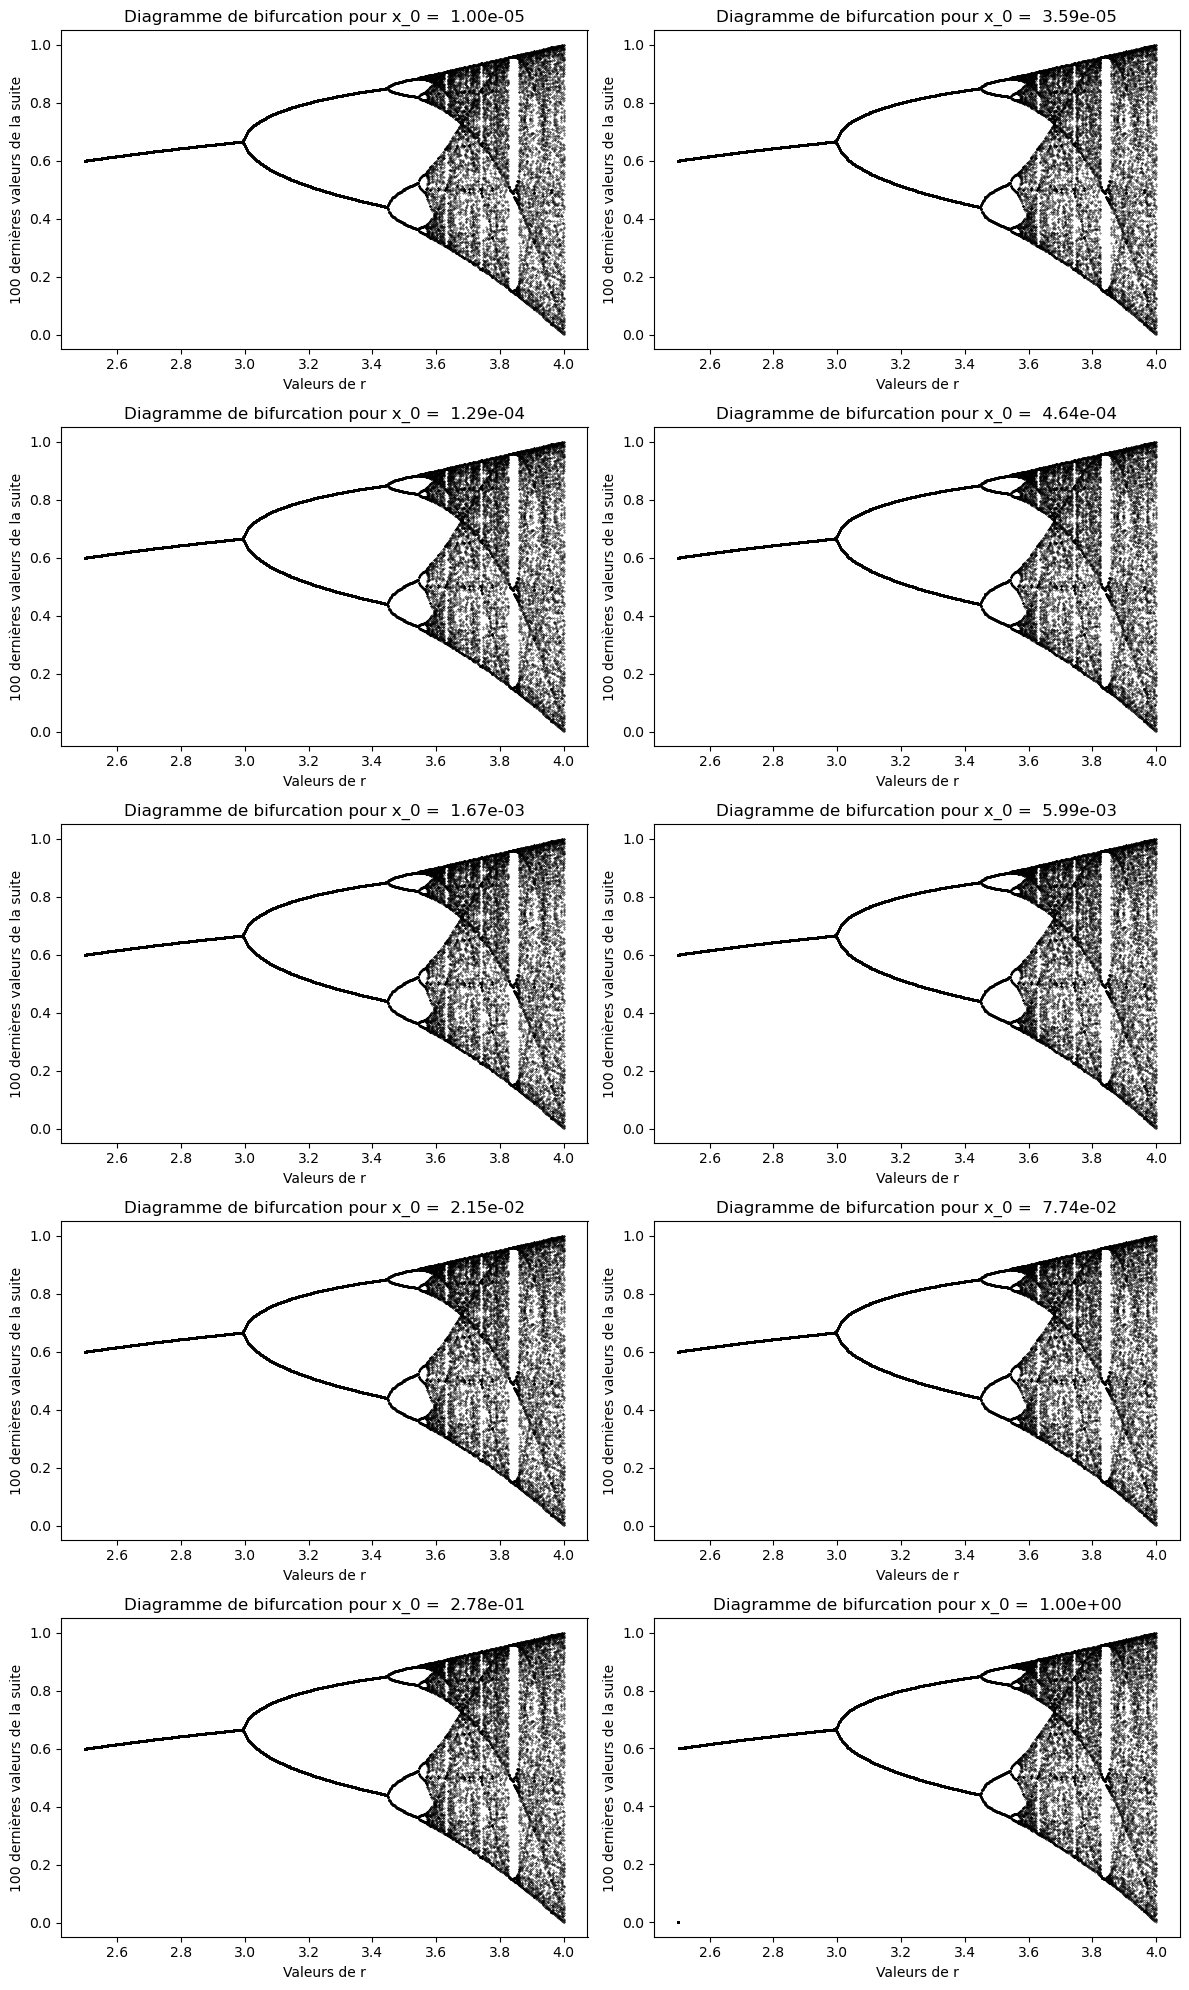

In [10]:
#on crée la figure
fig, axs = plt.subplots(nb_valeurs_de_x0 // 2 if nb_valeurs_de_x0 % 2 == 0 else nb_valeurs_de_x0 // 2 + 1, 2, figsize=(12, nb_valeurs_de_x0*2))                   

#on parcourt toutes les valeurs de x0 possibles, stockées dans le tableau x_0_2
for k, x0 in enumerate(x_0_2):
    #pour chacune de ces valeurs, on redéfinit la suite, déjà définie précédemment, en initialisant le premier terme de la sous-suite associée à x0
    suite_2[0][0] = x0
    for j, r1 in enumerate(r_2):
        #cette fois, c'est les valeurs de r que l'on parcourt
        for i in range(1, nb_valeurs_de_la_suite_2):
            #on définit l'élément [i] de la suite, nommé suite_i, par f(r, suite_2[i-1]), et f toujours la fonction logistique
            suite_i = fonction(r1, suite_2[j][i-1])
            suite_2[j][i] = suite_i
        
        suite_finale[j] = suite_2[j][-100:]
        
    ligne = k // 2 
    colonne = k % 2
    axs[ligne, colonne].plot((np.ones(nb_valeurs_de_r_2)*r_2).T, suite_finale, '.k', markersize = 0.6)
    axs[ligne, colonne].set_xlabel('Valeurs de r')
    axs[ligne, colonne].set_ylabel('100 dernières valeurs de la suite') 
    axs[ligne, colonne].set_title(f'Diagramme de bifurcation pour x_0 = {x_0_2[k]: .2e}')
    
    
#on obtient ainsi k tableaux 'suite finale', qui contiennent n x p éléments, avec n le nombre de valeurs différentes de r, p le nombre de valeurs de 
#la suite, et k le nombre de valeurs de x0 différentes

plt.tight_layout()
plt.show()

**On remarque que peu importe la valeur de $x_0$, le diagramme est toujours exactement identique: il nous indique que la suite converge vers une limite unique pour `r` jusqu'à `r = 3`, puis vers 2 limites distinctes pour `r`r entre `r = 3` et `r = 3.5`, puis pour `r > 3.5` la suite ne possède plus de valeur ponctuelle de limite. Le seul paramètre influant la convergence est donc `r`.**

## IV. Exposant de Lyapunov

Dans cette partie, nous allons caractériser plus précisément le comportement asymptotique de la suite en fonction du paramètre r. Pour cela nous définissons une fonction $\lambda(r)$ telle que : 

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$

Cette expression vient du caractère chaotique du système dynamique: la distance asymptotique entre deux jeux de paramètres initiaux va augmenter de manière exponentielle. D'où :

$$ e^{t \lambda(r)} $$

De plus, pour $\lambda(r) < 0$ la suite associée à l'équation logistique est convergente. Mais pour $\lambda(r) > 0$, la suite diverge, comme observé dans la section précédente. Nous allons de ce fait tracer le graphique de $\lambda$ en fonction de $r$.

In [11]:
#lambda est défini à partir de la fonction dérivée de f: on commence par calculer cette fonction
def dfonction(x, r):                   
    return r*(1-2*x)

In [12]:
#on crée les tableaux que l'on affichera ensuite
suite_lambda = np.ones((nb_valeurs_de_r_2, nb_valeurs_de_la_suite_2))
exposant = np.ones(nb_valeurs_de_r_2) #lambda que l'on calcule
origine = np.zeros(r_2.shape) #axe des abscisses

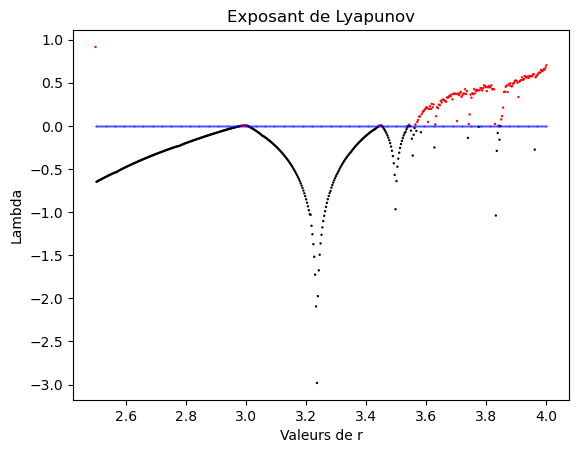

In [13]:
for i, r1 in np.ndenumerate(r_2):
    #dans la suite des lambda, on calcule explicitement lambda pour chaque valeur de f'(x_i) et pour chaque valeur de r
    suite_lambda[i] = np.log(np.abs(dfonction(suite_2[i], r1)))
    exposant[i] = (np.sum(suite_lambda[i])-suite_lambda[i][-1])/len(suite_lambda[i])

plt.plot(r_2, origine, '.b', markersize = 0.5)
plt.scatter(r_2, exposant, color = ['black' if l < 0 else 'red' for l in exposant], s = 0.5)
plt.xlabel('Valeurs de r')
plt.ylabel('Lambda')
plt.title('Exposant de Lyapunov')
plt.show()

**A partir de ce graphique, on voit que l'équation logistique est stable (la suite est convergente) pour `r` jusqu'à 3.5, comme nous l'avions déjà évoqué grâce au diagramme de bifurcation. Cependant nous apprenons que l'équation est stable pour quelques valeurs ponctuelles de `r > 3.5`.**